In [6]:
# Task 1: Import and Clean the Social Media Dataset

# Subtasks:
# 	1.	Load the dataset
# 	2.	Handle missing values
# 	3.	Format data

In [7]:
import pandas as pd

# Load dataset
file_path = "sentimentdataset.csv"
df = pd.read_csv(file_path)

# Remove unnecessary columns
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], errors="ignore", inplace=True)

# Convert Timestamp to datetime format (if column exists)
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Fill missing values
df.fillna({"Retweets": 0, "Likes": 0, "Sentiment": "Unknown", "User": "Unknown", 
           "Platform": "Unknown", "Country": "Unknown"}, inplace=True)

# Display cleaned dataset info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    float64       
 7   Likes      732 non-null    float64       
 8   Country    732 non-null    object        
 9   Year       732 non-null    int64         
 10  Month      732 non-null    int64         
 11  Day        732 non-null    int64         
 12  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 74.5+ KB
None
                                                Text    Sentiment  \
0   Enjoying a beautiful day at th

In [9]:
# 2. Analyze User Engagement Trends

# Subtasks:
# 	•	Aggregate engagement data (likes, retweets) over time
# 	•	Visualize trends

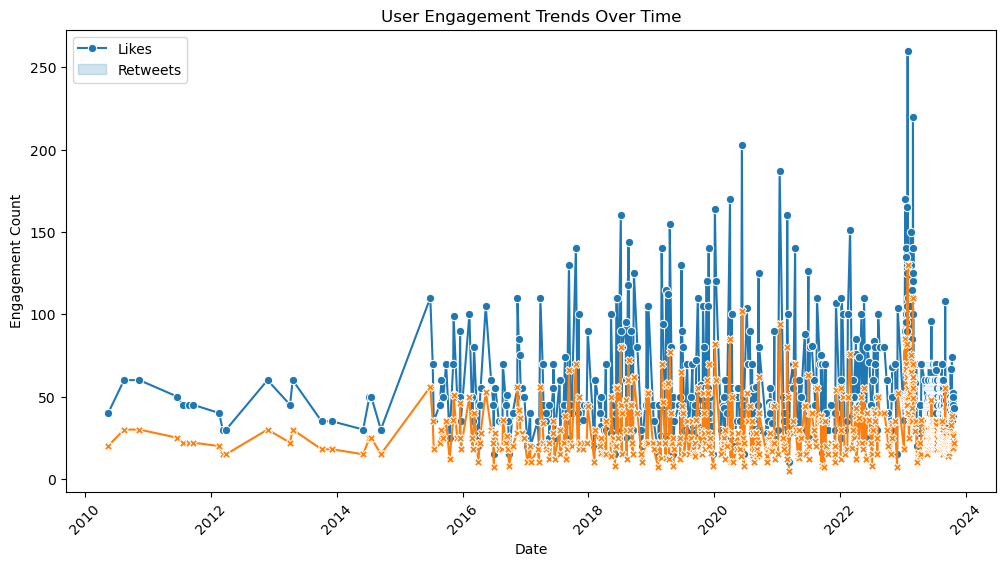

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract date from timestamp
df['Date'] = df['Timestamp'].dt.date

# Aggregate engagement metrics
engagement_trends = df.groupby('Date')[['Likes', 'Retweets']].sum()

# Plot engagement trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=engagement_trends, markers=True, dashes=False)
plt.xlabel("Date")
plt.ylabel("Engagement Count")
plt.title("User Engagement Trends Over Time")
plt.xticks(rotation=45)
plt.legend(["Likes", "Retweets"])
plt.show()

In [13]:
# 3. Identify Key Influencers and Popular Content

# Subtasks:
# 	•	Identify top influencers based on total engagement
# 	•	Find the most engaging posts

In [15]:
# Calculate total engagement
df['Total_Engagement'] = df['Likes'] + df['Retweets']

# Top influencers based on engagement
top_influencers = df.groupby('User')['Total_Engagement'].sum().sort_values(ascending=False).head(10)

# Most engaging posts
top_posts = df[['Text', 'Total_Engagement']].sort_values(by='Total_Engagement', ascending=False).head(10)

print("Top 10 Influencers:\n", top_influencers)
print("\nTop 10 Most Engaging Posts:\n", top_posts)

Top 10 Influencers:
 User
WinterWarmth         255.0
CosmosExplorer       240.0
CarnivalDreamer      216.0
CulinaryExplorer     210.0
MusicHarmonist       210.0
PeakConqueror        207.0
EchoedLaughter       195.0
RainNurturer         189.0
GrowthSeeker         180.0
DanceEnthusiast      166.0
Name: Total_Engagement, dtype: float64

Top 10 Most Engaging Posts:
                                                   Text  Total_Engagement
481  Surrounded by the colors of joy, a canvas pain...             120.0
530  Captivated by the spellbinding plot twists, th...             120.0
382  A sense of wonder at the vastness of the cosmo...             120.0
560  In the serene beauty of a sunset, nature unfol...             120.0
470  Dancing on sunshine, each step a celebration o...             120.0
550  After a series of defeats, the soccer team fac...             120.0
368  Elation over discovering a rare book in a quai...             120.0
540  Celebrating a historic victory in the World Cu

In [17]:
# 4. Create Visualizations

# Subtasks:
# 	•	Bar plot for top influencers
# 	•	Bar plot for most engaging posts

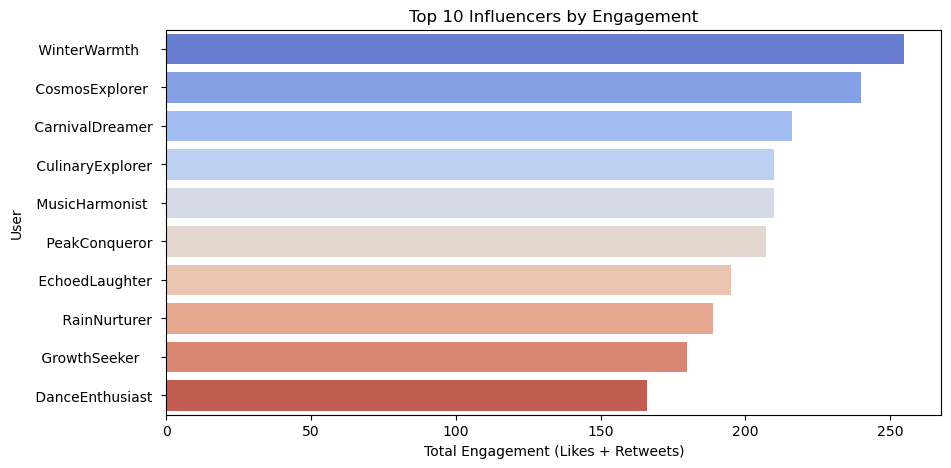

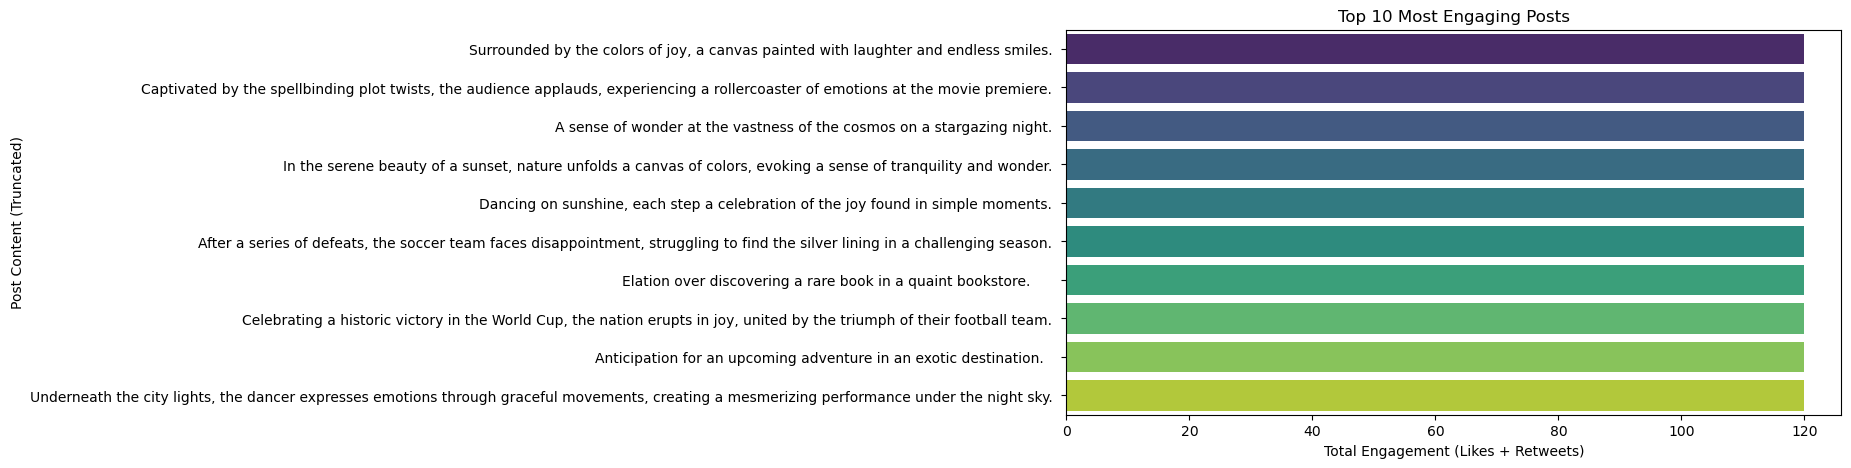

In [21]:
# Bar plot for top influencers
plt.figure(figsize=(10, 5))
sns.barplot(x=top_influencers.values, y=top_influencers.index, hue=top_influencers.index, palette="coolwarm", legend=False)
plt.xlabel("Total Engagement (Likes + Retweets)")
plt.ylabel("User")
plt.title("Top 10 Influencers by Engagement")
plt.show()

# Bar plot for top posts
plt.figure(figsize=(10, 5))
sns.barplot(x=top_posts["Total_Engagement"], y=top_posts["Text"], hue=top_posts["Text"], palette="viridis", legend=False)
plt.xlabel("Total Engagement (Likes + Retweets)")
plt.ylabel("Post Content (Truncated)")
plt.title("Top 10 Most Engaging Posts")
plt.show()